## CASE STUDY: Multiple Linear Regression

- This study involves prediction of car price based on multiple features (numerical and catergorical)
- The study also demonstrate how to encode categorical variable using ColumnTransformer and make_column_transformer module

In [55]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [56]:
# load the dataset
df = pd.read_csv('car_price.csv')

In [57]:
# display the first few rows
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


### Data Wrangling

In [58]:
# shape of the dataset
df.shape

(13, 4)

In [59]:
# checking the missing values
df.isna().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [60]:
# checking for duplicated values
df.duplicated().sum()

0

In [61]:
#Renaming the columns
df = df.rename(columns={
    'Car Model': 'car_model',
    'Mileage' : 'mileage',
    'Sell Price($)' : 'price',
    'Age(yrs)': 'age'
})

In [62]:
#confirming columns has been renamed
df.head()

,car_model,mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [63]:
# checking datatypes
df.dtypes

car_model    object
mileage       int64
price         int64
age           int64
dtype: object

In [64]:
#checking the unique values in the car_model
df['car_model'].unique()

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

### Data Exploration

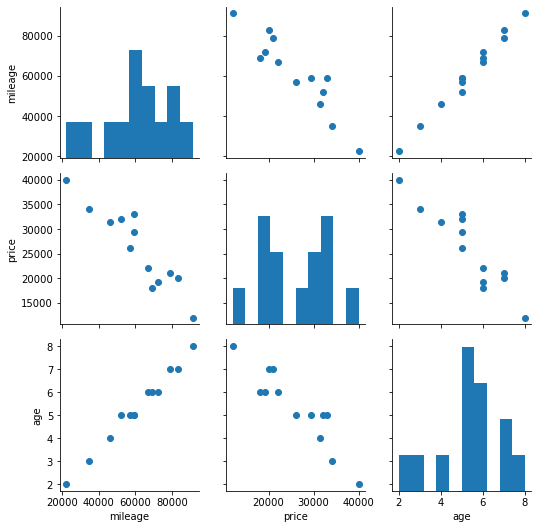

In [65]:
# plotting a pairGrid scatter plot

var = ['mileage', 'price', 'age']
g = sns.PairGrid(data = df, vars=var)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
plt.show()

- There is a linear relationship between the input features (mileage and age) and the target feature(price)

### Multiple Linear Regression

#### Data Preprocessing

In [67]:
df.head(3)

,car_model,mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5


In [69]:
# create the X variable (note: X must be a 2D array)

X = df[['car_model', 'mileage', 'age']].values
X

array([['BMW X5', 69000, 6],
       ['BMW X5', 35000, 3],
       ['BMW X5', 57000, 5],
       ['BMW X5', 22500, 2],
       ['BMW X5', 46000, 4],
       ['Audi A5', 59000, 5],
       ['Audi A5', 52000, 5],
       ['Audi A5', 72000, 6],
       ['Audi A5', 91000, 8],
       ['Mercedez Benz C class', 67000, 6],
       ['Mercedez Benz C class', 83000, 7],
       ['Mercedez Benz C class', 79000, 7],
       ['Mercedez Benz C class', 59000, 5]], dtype=object)

In [70]:
# create the y variable
y = df['price']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: price, dtype: int64

### Preprocessing the Categorical variable
#### Using Column Transformer

In [71]:
# import the one hot encoder module

from sklearn.preprocessing import OneHotEncoder

In [72]:
#import the column transformer module

from sklearn.compose import ColumnTransformer

In [73]:
#create an object of the column transformer encoder
ct = ColumnTransformer([("car_model", OneHotEncoder(), [0])], remainder ='passthrough')

In [75]:
# fit_transform the X variable(input features)
X = ct.fit_transform(X)

In [84]:
# displaying the transformed X values
X

array([[0.0, 1.0, 0.0, 69000, 6],
       [0.0, 1.0, 0.0, 35000, 3],
       [0.0, 1.0, 0.0, 57000, 5],
       [0.0, 1.0, 0.0, 22500, 2],
       [0.0, 1.0, 0.0, 46000, 4],
       [1.0, 0.0, 0.0, 59000, 5],
       [1.0, 0.0, 0.0, 52000, 5],
       [1.0, 0.0, 0.0, 72000, 6],
       [1.0, 0.0, 0.0, 91000, 8],
       [0.0, 0.0, 1.0, 67000, 6],
       [0.0, 0.0, 1.0, 83000, 7],
       [0.0, 0.0, 1.0, 79000, 7],
       [0.0, 0.0, 1.0, 59000, 5]], dtype=object)

In [85]:
# Creating the model
model = LinearRegression()

In [86]:
# Training the model
model.fit(X, y)

LinearRegression()

In [88]:
# checking the model accuracy
model.score(X, y)

0.9417050937281083

#### Making new predictions

In [87]:
# Predict the price of a Mercedes benz that is 4 yrs old with mileage 45000

model.predict([[0, 0, 1, 45000, 4]])

array([36991.3172106])

In [90]:
# Predict the price of a BMW X5 that is 7yrs with mileage 86000

model.predict([[0, 1, 0, 86000, 7]])

array([11080.74313221])

### Preprocessing the Categorical variable
#### Using make column transformer

In [92]:
# importing the make column transformer module
from sklearn.compose import make_column_transformer

In [97]:
# creating the X variables

XX = df[['car_model', 'mileage', 'age']]
XX

,car_model,mileage,age
0,BMW X5,69000,6
1,BMW X5,35000,3
2,BMW X5,57000,5
3,BMW X5,22500,2
4,BMW X5,46000,4
5,Audi A5,59000,5
6,Audi A5,52000,5
7,Audi A5,72000,6
8,Audi A5,91000,8
9,Mercedez Benz C class,67000,6


In [104]:
#creating an object of the make_column_transformer module

mct = make_column_transformer( (OneHotEncoder(), ['car_model']), remainder='passthrough')

In [105]:
# fit_transform the XX variable
XX = mct.fit_transform(XX)

In [106]:
# creating a model

model2 = LinearRegression()

In [107]:
# Training the model

model2.fit(XX, y)

LinearRegression()

In [108]:
# Checking the accuracy of the model

model2.score(XX, y)

0.9417050937281083

In [109]:
# Displaying the transformed XX variables
XX

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

#### Making Predictions

In [110]:
# Predict the price of a Mercedes benz that is 4 yrs old with mileage 45000

model2.predict([[0, 0, 1, 45000, 4]])

array([36991.3172106])

In [111]:
# Predict the price of a BMW X5 that is 7yrs with mileage 86000

model2.predict([[0, 1, 0, 86000, 7]])

array([11080.74313221])